In [18]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import spacy
import preprocessor as tp

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from SBM.TextProcessor import *

In [2]:
df_tweets = pd.read_csv(os.path.join("data", "twitter_parsed_dataset.csv"), usecols = ['Text','Annotation', 'oh_label'])
df_tweets = df_tweets[df_tweets['Text'].notna()]
df_tweets = df_tweets[df_tweets['oh_label'].notna()]
df_tweets

,Text,Annotation,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,#mkr No No No No No No,none,0.0
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",none,0.0
16847,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [8]:
nb_no_bullying = len(df_tweets[df_tweets['oh_label'] == 0.0])
nb_bullying = len(df_tweets[df_tweets['oh_label'] == 1.0])

Text(0.5, 0.98, 'Tweet class repartition')

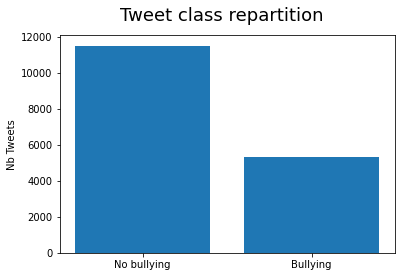

In [15]:
fig, ax = plt.subplots()
ax.bar(["No bullying", "Bullying"], [nb_no_bullying,nb_bullying ])
ax.set_ylabel("Nb Tweets")
fig.suptitle("Tweet class repartition", fontsize=18)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_tweets['Text'].to_numpy(), df_tweets['oh_label'].to_numpy(), test_size=0.20)

In [ ]:
params = {
    'tp__remove_stop_word': (True, False),
    'tp__remove_punctuation' : (True, False),
    'tp__min_word_size' : (2,3,4,5),
    'tp__special_token_method' : (SpecialTokenMethod.REMOVE, SpecialTokenMethod.PREPROCESS, SpecialTokenMethod.KEEP),
    'tfidf__use_idf' : (True, False),
    'lr__penalty' : ('l1','l2','elasticnet'),
    'lr__C' : (0.5, 1.0, 2.0)
}

lr = Pipeline([('tp', TextProcessor()),
                ('tfidf',TfidfVectorizer()), 
                ('lr',LogisticRegression())])

random_search_lr = RandomizedSearchCV(lr, params,scoring='f1', n_iter=50, verbose=1, cv=5, n_jobs=-1)
random_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [8]:
pipeline = Pipeline([('text_proccesor', TextProcessor(remove_stop_word=True, 
                                                      remove_punctuation=True, 
                                                      twitter_tokens=None, 
                                                      min_word_size=2,
                                                      special_token_method=SpecialTokenMethod.PREPROCESS)),
                     ('tfidf',TfidfVectorizer()), 
                       ('model',LogisticRegression())])

In [9]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('text_proccesor',
                 TextProcessor(remove_punctuation=True, remove_stop_word=True)),
                ('tfidf', TfidfVectorizer()), ('model', LogisticRegression())])

In [12]:
y_pred = pipeline.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      2297
         1.0       0.81      0.57      0.67      1073

    accuracy                           0.82      3370
   macro avg       0.81      0.75      0.77      3370
weighted avg       0.82      0.82      0.81      3370



In [14]:
print(confusion_matrix(y_test, y_pred))

[[2151  146]
 [ 463  610]]
